# **IDEA 1: Exploratory Data Analysis (EDA) on Retail Sales Data**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# *# Step 1: Data Loading and Cleaning*

In [ ]:
retail_sales_df = pd.read_csv('retail_sales_dataset.csv')
menu_df = pd.read_csv('menu.csv')

In [ ]:
# Show retail sales dataframe
retail_sales_df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
# Show menu dataframe
menu_df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Transaction ID
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,10,4,17,3,17,10,0,25,15,1
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,10,4,17,3,18,6,0,25,8,2
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,10,4,17,2,14,8,0,25,10,3
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,10,4,17,2,21,15,0,30,15,4
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,10,4,17,2,21,6,0,25,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,27,1,4,64,12,15,0,40,8,256
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,35,1,5,85,15,20,0,50,10,257
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,18,1,2,43,8,10,0,25,6,258
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,38,2,9,103,21,20,0,60,6,259


In [ ]:
# Check for missing values
print("Missing values in retail sales dataset:")
print(retail_sales_df.isnull().sum())

Missing values in retail sales dataset:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [ ]:
# Remove duplicates
retail_sales_df = retail_sales_df.drop_duplicates()
menu_df = menu_df.drop_duplicates()

# *# Step 2: Descriptive Statistics*

In [ ]:
#print("\nDescriptive statistics of retail sales dataset & menu dataset:")
print(retail_sales_df.describe())
print(menu_df.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000
          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  

# *# Step 3: Time Series Analysis*

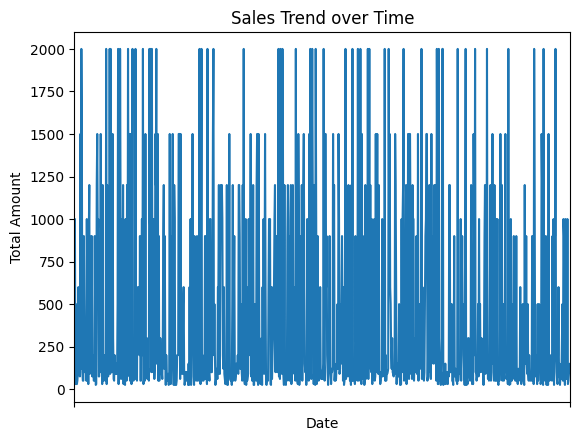

In [ ]:
retail_sales_df['Date'] = pd.to_datetime(retail_sales_df['Transaction ID'])
retail_sales_df.set_index('Date', inplace=True)
retail_sales_df['Total Amount'].plot()
plt.title('Sales Trend over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

# *# Step 4: Customer and Product Analysis*


In [ ]:
customer_demographics = retail_sales_df.groupby('Customer ID').agg({'Age': 'mean', 'Gender': 'first'})
product_analysis = retail_sales_df.merge(menu_df, how='left', on='Transaction ID')

# *# Step 5: Visualization*
Bar chart for sales by product category

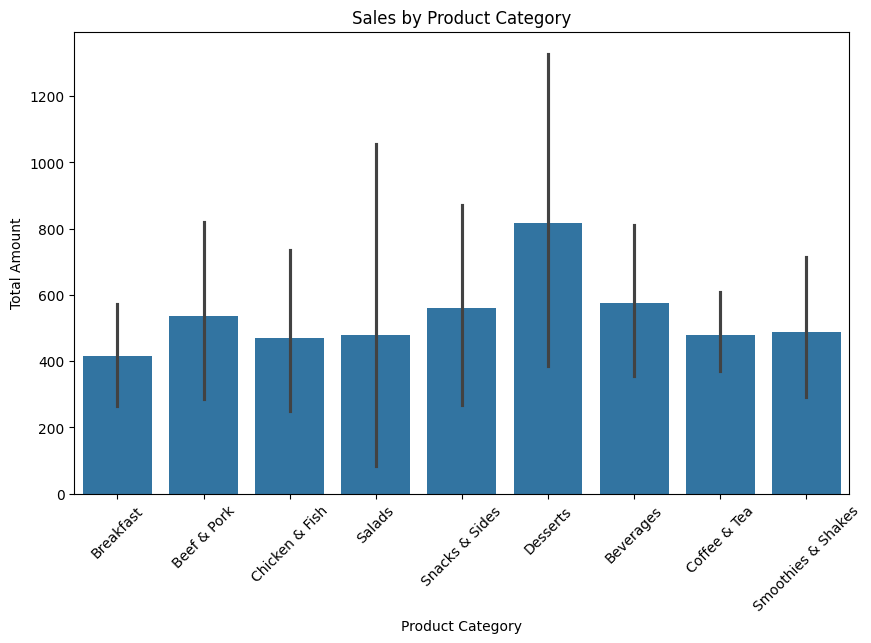

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total Amount', data=product_analysis)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

*# Heatmap for correlation between variables*

<ipython-input-30-7a596bc232ec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(product_analysis.corr(), annot=True, cmap='coolwarm')


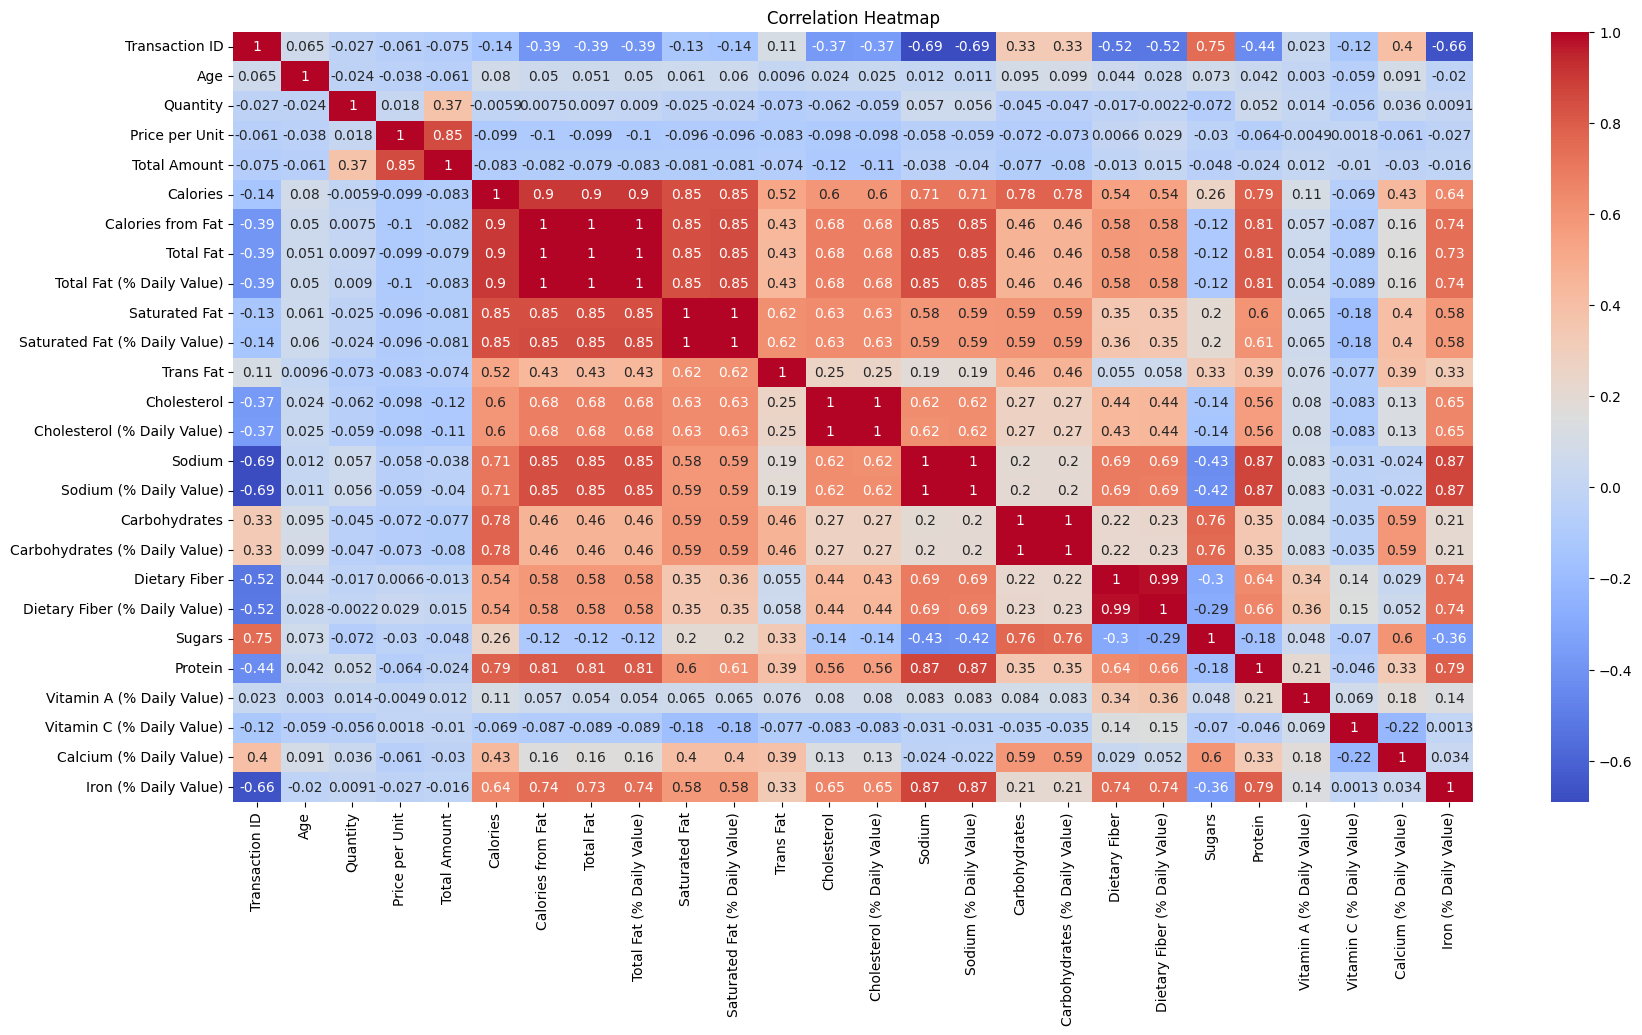

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(product_analysis.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# *# Step 6: Recommendation*
 Increase marketing efforts for top-selling product categories.


In [ ]:
# Identify top-selling product categories
top_categories = product_analysis.groupby('Category')['Total Amount'].sum().nlargest(3).index.tolist()

# Generate marketing strategies for top-selling categories
print("\nMarketing Strategies for Top-Selling Product Categories:")
for category in top_categories:
    print(f"- Implement targeted marketing campaigns for {category} products to maximize sales.")



Marketing Strategies for Top-Selling Product Categories:
- Implement targeted marketing campaigns for Coffee & Tea products to maximize sales.
- Implement targeted marketing campaigns for Breakfast products to maximize sales.
- Implement targeted marketing campaigns for Beverages products to maximize sales.
